<a href="https://www.kaggle.com/code/dheerajanumula/eda-project-3-covid-19-report?scriptVersionId=255382231" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# "COVID-19 Country-Wise Insights and Trends"


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


-> To begin the analysis, we import the essential Python libraries:

pandas for data manipulation and analysis.

numpy for numerical operations.

matplotlib.pyplot for visualizing the data.

-> We load the **Country_wise_latest** csv from corona-virus-report Data set using pandas.read_csv(), which reads the data from the provided file path and stores it in a DataFrame named df

In [2]:
df=pd.read_csv("/kaggle/input/corona-virus-report/country_wise_latest.csv")
df=pd.DataFrame(df)
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


**Notes**: The dataset contains confirmed cases, deaths, recoveries, and weekly changes for 187 countries/regions.
It includes metrics like case fatality rate, recovery rate, and WHO region classification.
Useful for analyzing trends, mortality, and recovery patterns across the globe.

-> df.head() to display the first five rows of the dataset and get a quick overview of its structure and contents.

In [3]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
print(df.shape)          # Rows and columns
print(df.columns)        # Column names
print(df.info())         # Data types and nulls


(187, 15)
Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null

In [5]:
print(df.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


**Notes**: From info and checking null values data is clean for our analysis 


# EDA

**Bar chart of Top 10 Countries by confirmed cases**

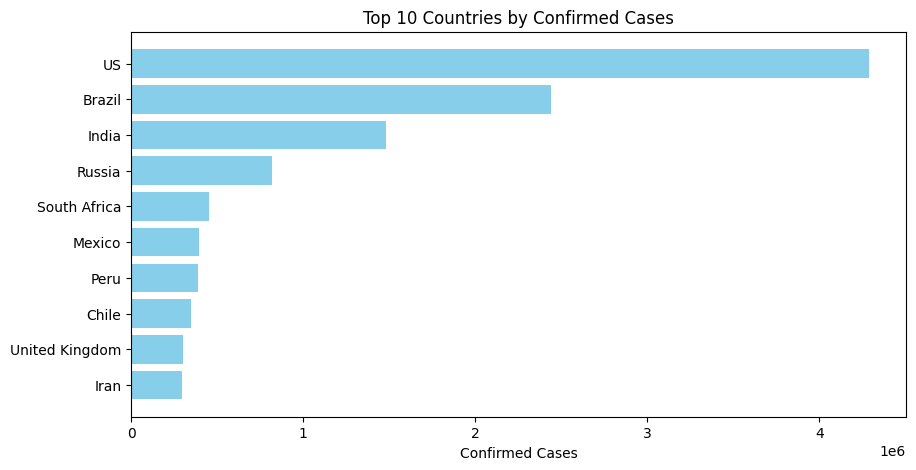

In [6]:
top_confirmed = df.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(top_confirmed['Country/Region'], top_confirmed['Confirmed'], color='skyblue')
plt.xlabel("Confirmed Cases")
plt.title("Top 10 Countries by Confirmed Cases")
plt.gca().invert_yaxis()
plt.show()

**Notes**: US recoreded highest no of cases followed by Brazil and India

**Bar Chart Top 10 countries by death**

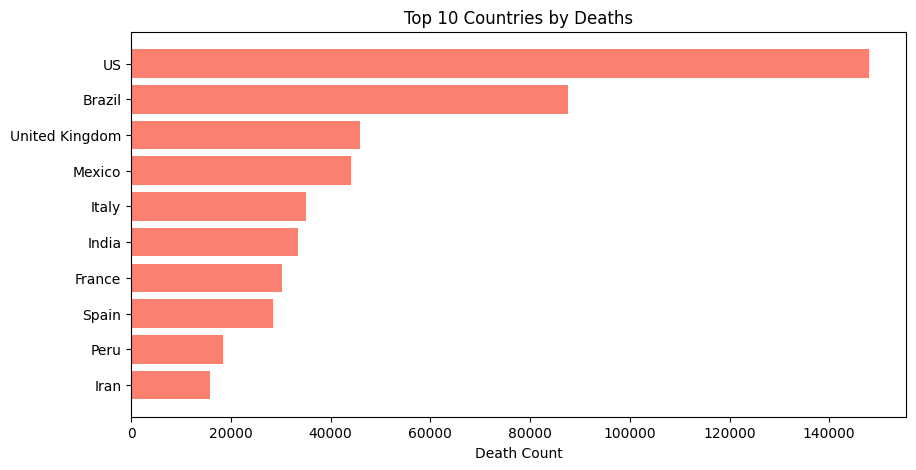

In [7]:
top_deaths = df.sort_values(by='Deaths', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(top_deaths['Country/Region'], top_deaths['Deaths'], color='salmon')
plt.xlabel("Death Count")
plt.title("Top 10 Countries by Deaths")
plt.gca().invert_yaxis()
plt.show()

**Notes**: USA recorded maximum no of deaths around 140000 deaths followed by Brazil and UK

**Bar Chart - Death Rate**

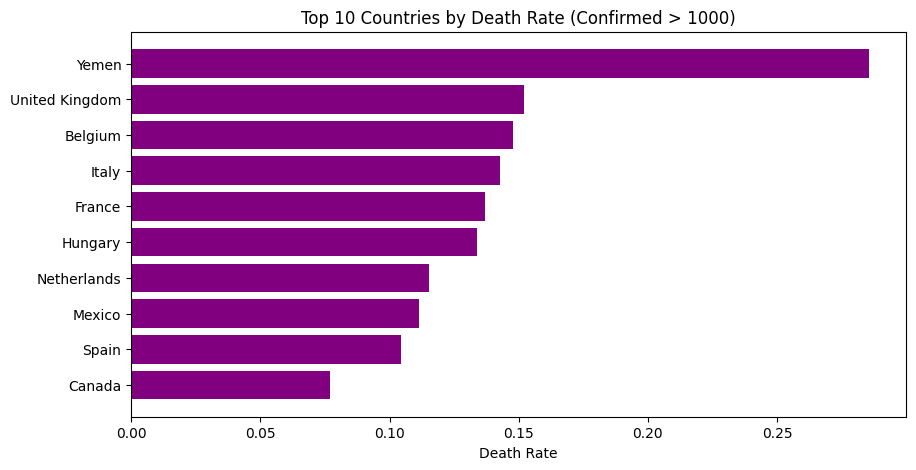

In [8]:
df['Death_Rate'] = df['Deaths'] / df['Confirmed']
df['Death_Rate']=df['Death_Rate'].fillna(0)

top_death_rate = df[df['Confirmed'] > 1000].sort_values(by='Death_Rate', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(top_death_rate['Country/Region'], top_death_rate['Death_Rate'], color='purple')
plt.xlabel("Death Rate")
plt.title("Top 10 Countries by Death Rate (Confirmed > 1000)")
plt.gca().invert_yaxis()
plt.show()

**Notes**:  calcauted death rate as no of deaths per unit confirmed case
Yemen has highest death rate more than 0.25

**Bar Chart - Recovory Rate**

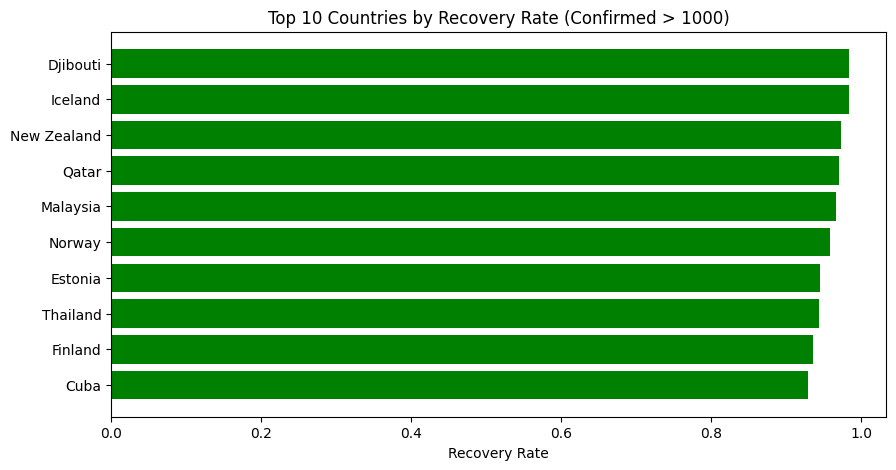

In [9]:
df['Recovery_Rate'] = df['Recovered'] / df['Confirmed']
df['Recovery_Rate']=df['Recovery_Rate'].fillna(0)

top_recovery = df[df['Confirmed'] > 1000].sort_values(by='Recovery_Rate', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(top_recovery['Country/Region'], top_recovery['Recovery_Rate'], color='green')
plt.xlabel("Recovery Rate")
plt.title("Top 10 Countries by Recovery Rate (Confirmed > 1000)")
plt.gca().invert_yaxis()
plt.show()

**Notes**: Calculated recovery rate as no of recovered per confirmed 

Djibouti has highest recovery rate and all mentioned countries also have similar recovery rate between 0.8 and 1

**Which country has most Deaths**

In [10]:
max_deaths_country = df.loc[df['Deaths'].idxmax()]
print("Country with most deaths:", max_deaths_country['Country/Region'])
print("Deaths:", max_deaths_country['Deaths'])

Country with most deaths: US
Deaths: 148011


**which country has most recovered people**

In [11]:
max_recovered_country = df.loc[df['Recovered'].idxmax()]
print("Country with most recovered:", max_recovered_country['Country/Region'])
print("Recovered:", max_recovered_country['Recovered'])

Country with most recovered: Brazil
Recovered: 1846641


**which countries have 0 deaths and confirmed cases:**

In [12]:
zero_death = df[(df['Deaths'] == 0) & (df['Confirmed'] > 0)]
print("Countries with 0 deaths and confirmed cases:")
print(zero_death[['Country/Region', 'Confirmed']])

Countries with 0 deaths and confirmed cases:
                       Country/Region  Confirmed
19                             Bhutan         99
30                           Cambodia        226
49                           Dominica         18
55                            Eritrea        265
59                               Fiji         27
68                          Greenland         14
69                            Grenada         23
75                           Holy See         12
94                               Laos         20
114                          Mongolia        289
130                  Papua New Guinea         62
140             Saint Kitts and Nevis         17
141                       Saint Lucia         24
142  Saint Vincent and the Grenadines         52
148                        Seychelles        114
168                       Timor-Leste         24
181                           Vietnam        431


**how many unique regions are there in data**

In [13]:
print(df['WHO Region'].unique())

['Eastern Mediterranean' 'Europe' 'Africa' 'Americas' 'Western Pacific'
 'South-East Asia']


**Percentage of Confirmed cases by WHO Regions (pie Chart)**

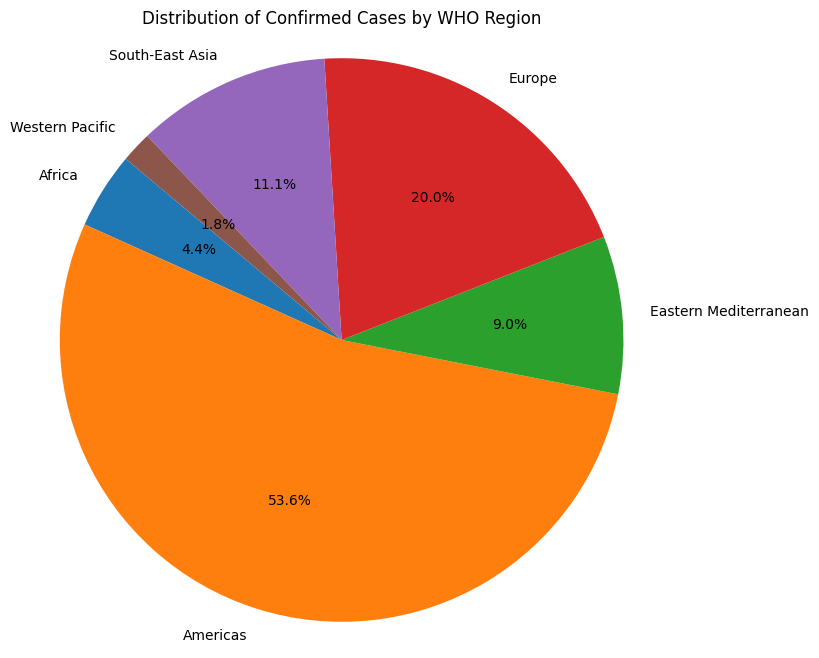

In [14]:
region_cases = df.groupby('WHO Region')['Confirmed'].sum()

plt.figure(figsize=(8,8))
plt.pie(region_cases, labels=region_cases.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Confirmed Cases by WHO Region')
plt.axis('equal')
plt.show()

**Notes**: Americas have highest confirmed cases in world more than 50%

**What are the top 5 countries with highest death rate**

In [15]:
# Top 5 countries by death rate (with at least 1000 confirmed cases)
high_death_rate = df[df['Confirmed'] >= 1000].sort_values('Death_Rate', ascending=False).head(5)


high_death_rate

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Death_Rate,Recovery_Rate
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean,0.285630,0.492608
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe,0.151948,0.004763
16,Belgium,66428,9822,17452,39154,402,1,14,14.79,26.27,56.28,64094,2334,3.64,Europe,0.147859,0.262721
85,Italy,246286,35112,198593,12581,168,5,147,14.26,80.64,17.68,244624,1662,0.68,Europe,0.142566,0.806351
61,France,220352,30212,81212,108928,2551,17,267,13.71,36.86,37.20,214023,6329,2.96,Europe,0.137108,0.368556


**Notes**: Yemen UK, Belgium, Italy and France have highest death rate

**what are the top 5 countries  by 1-week % increase**

In [16]:
# Top 5 countries by 1-week % increase
top_weekly_increase = df.sort_values('1 week % increase', ascending=False).head(5)

print("Top 5 countries by 1-week % increase:")
print(top_weekly_increase[['Country/Region', 'Confirmed last week', '1 week change', '1 week % increase']])

Top 5 countries by 1-week % increase:
       Country/Region  Confirmed last week  1 week change  1 week % increase
130  Papua New Guinea                   19             43             226.32
63             Gambia                  112            214             191.07
11            Bahamas                  174            208             119.54
186          Zimbabwe                 1713            991              57.85
99              Libya                 1980            847              42.78


**what is the average 1-week % increase globally**

In [17]:
avg_increase = df['1 week % increase'].mean()
print(f"Average 1-week % increase globally: {avg_increase:.2f}%")

Average 1-week % increase globally: 13.61%


**top 10 countries with 1 week % increase ( Bar Chart)**

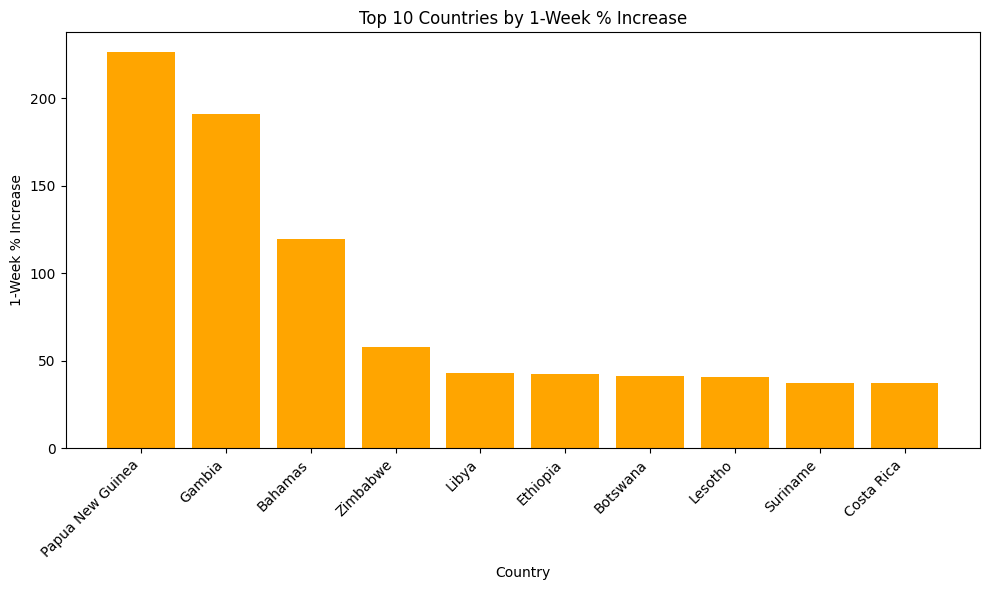

In [18]:
import matplotlib.pyplot as plt

top10_increase = df.sort_values('1 week % increase', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top10_increase['Country/Region'], top10_increase['1 week % increase'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries by 1-Week % Increase')
plt.xlabel('Country')
plt.ylabel('1-Week % Increase')
plt.tight_layout()
plt.show()

**Notes**: Papua New Guinea and Gambia has highest 1 week % increase


# Summary 

1. The dataset includes COVID-19 confirmed cases, deaths, recoveries, and weekly trends for 187 countries.
2. USA recorded the highest number of cases and deaths, followed by Brazil and India.
3.  Yemen has the highest death rate (>25%), while Djibouti shows the highest recovery rate (0.8–1).
4.  Some countries like Bhutan, Cambodia, and Dominica had confirmed cases but reported zero deaths.
5.   The Americas accounted for over 50% of total global cases.
6.   The average 1-week percentage increase in cases globally was 13.61%.




Countries with strong healthcare systems show higher recovery rates and lower death rates.
